In [ ]:
using Plots, ComplexPhasePortrait, ApproxFun
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk


<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes



# Lecture 7: Integrals over the real line


This lecture we cover

1. Integrals over real lines
    - Principal value integral
    - Cauchy's integral formula and Residue theorem on the real line
    - Jordan's lemma
    - Application: Calculating Fourier tranforms of weakly decaying functions
2. Functions with branch cuts
    - Logarithmic function


## Integrals over the real line

Integrals on the real line are always to viewed as improper integrals:

$$ \int_{-\infty}^\infty f(x) \dx = \int_0^\infty f(x) \dx +\int_{-\infty}^0 f(x)\dx = \lim_{b \rightarrow \infty} \int_0^b f(x) \dx + \lim_{a \rightarrow -\infty} \int_a^0 f(x) \dx.$$

**Definition (Principal value integral on the real line)** The _(Cauchy) principal value integral on the real line_ is defined as
$$
\infdashint f(x) \dx := \lim_{M\rightarrow \infty} \int_{-M}^M f(x) \dx
$$

**Proposition (Integability $\Rightarrow$ Prinipal value integrability)** If 
$ \int_{-\infty}^\infty f(x) \dx < \infty$
then 
$$ \infdashint f(x) \dx = \int_{-\infty}^\infty f(x) \dx.$$


### Residue theorem on the real line

The real line doesn't have an _inside_ and _outside_, rather an _above_ and _below_, or _left_ and _right_. Thus we get the following two versions of the Residue theorem:

**Definition (Upper/lower half plane)** Denote the upper/lower half plane by
$$
{\mathbb H}^+ = \{z : \Re z > 0 \}  \\
{\mathbb H}^- = \{z : \Re z < 0 \} 
$$
The closure is denoted
$$
\bar{\mathbb H}^+ = {\mathbb H}^+ \cup {\mathbb R} \cup \{\infty\}  \\
\bar{\mathbb H}^- = {\mathbb H}^- \cup {\mathbb R} \cup \{\infty\}
$$

**Theorem (Residue theorem on the real line)** Suppose $f : \bar {\mathbb H}^+ \backslash \{z_1,\ldots,z_r \} \rightarrow {\mathbb C}$ is holomorphic in ${\mathbb H}^+ \backslash \{z_1,\ldots,z_r \}$, where $\Re z_k > 0$, and  $\lim_{\epsilon \rightarrow 0} f(x + i \epsilon) = f(x)$ converges uniformly.  If 
$$ \lim_{z \rightarrow \infty} z f(z) = 0
$$ uniformly for $z \in \bar {\mathbb H}^+$, then
$$
\infdashint f(x) \dx = 2 \pi i \sum_{k=1}^r {\underset{z = z_k}{\rm Res}} \, f(z)
$$
Similarly, if the equivalent conditions hold in the lower half plane for $f : \bar{\mathbb H}^- \backslash \{z_1,\ldots,z_r \} \rightarrow {\mathbb C}$ then
$$
\infdashint f(x) \dx = -2 \pi i \sum_{k=1}^r {\underset{z = z_k}{\rm Res}} \, f(z)
$$


Examples:

In [ ]:
f = x -> x^2/(x^4+1)
phaseplot(-3..3, -2..2, f)

This function has poles in the upper plane, but has sufficient decay that we can apply Residue theorem:

In [4]:
z₁,z₂,z₃,z₄ = exp(im*π/4), exp(3im*π/4), exp(5im*π/4), exp(7im*π/4)

res₁ = z₁^2 / ((z₁ - z₂)*(z₁ - z₃)*(z₁ - z₄) )
res₂ = z₂^2 / ((z₂ - z₁)*(z₂ - z₃)*(z₂ - z₄) )

2π*im*(res₁ + res₂), sum(Fun(f, Line()))

(2.221441469079183 + 3.487868498008632e-16im, 2.221441469084968)

We can also apply Resiude theorem in the lower-half plane, and we get the same result:

In [5]:
res₃ = z₃^2 / ((z₃ - z₁)*(z₃ - z₂)*(z₃ - z₄) )
res₄ = z₄^2 / ((z₄ - z₁)*(z₄ - z₃)*(z₄ - z₂) )

-2π*im*(res₃ + res₄), sum(Fun(f, Line()))

(2.221441469079183 + 5.231802747012948e-16im, 2.221441469084968)

### Cauchy's integral formula on the real line

An immediate consequence of the Residue theorem is Cauchy's integral formula on the real line:

**Theorem (Cauchy's integral formula on the real line)** Suppose $f : \bar {\mathbb H}^+  \rightarrow {\mathbb C}$ is holomorphic in ${\mathbb H}^+ $, and  $\lim_{\epsilon \rightarrow 0} f(x + i \epsilon) = f(x)$ converges uniformly.  If 
$$ 
\lim_{z \rightarrow \infty} f(z) = 0
$$ 
uniformly for $z \in \bar {\mathbb H}^+$, then
$$
f(z) = {1 \over 2 \pi i} \infdashint {f(x) \over x - z} dx
$$
for all  $z \in {\mathbb H}^+$.


_Examples_ Here is a simple example of $f(x) = {x^2 \over (x+ i)^3}$, which is analytic in the upper half plane:

In [7]:
f = x -> x^2/(x+im)^3
z = 2.0+2.0im
sum(Fun(x-> f(x)/(x - z), Line()))/(2π*im) - f(z)

2.69638478211931e-13 - 3.032296636007459e-13im

Evaluating in lower half plane doesn't work b ecause it has a pole there:

In [9]:
f = x -> x^2/(x+im)^3
z = 2.0-2.0im
sum(Fun(x-> f(x)/(x - z), Line()))/(2π*im) , f(z)

(2.2331966377567175e-13 + 2.0218605967538834e-14im, 0.7040000000000001 - 0.128im)

But does for a function analytic in the lower half plane (with a minus sign):

In [10]:
f = x -> x^2/(x-im)^3
z = 2.0-2.0im
-sum(Fun(x-> f(x)/(x - z), Line()))/(2π*im) , f(z)

(0.03277196176631425 + 0.16750113791564233im, 0.03277196176604461 + 0.1675011379153391im)

It also works for functions with exponential decay in the upper-half plane:

In [11]:
f = x -> exp(im*x)/(x+im)
z = 2 + 2im
sum(Fun(x-> f(x)/(x - z), -500 .. 500))/(2π*im) - f(z)

4.501316791527543e-9 + 5.93330299732131e-7im

This is difficult as a real integral as the integrand is very oscillatory:

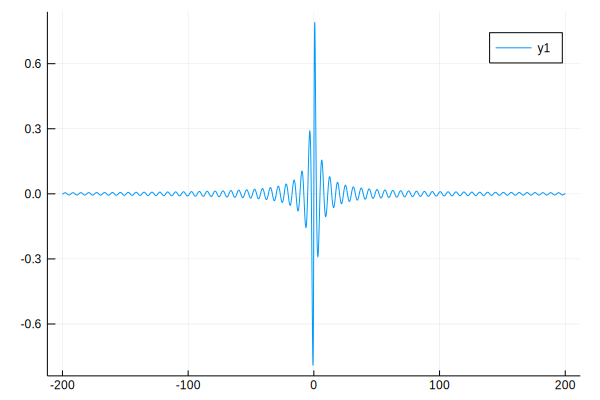

In [13]:
xx = -200:0.1:200
plot(xx,real.(f.(xx)))

An equivalent result holds in the negative real axis, but be careful:

In [17]:
z = -2-im
f = x -> exp(im*x)/(x+im)
sum(Fun(x-> f(x)/(x - z), -500 .. 500))/(2π*im)

-4.529525111429054e-9 + 5.865568293152012e-7im

In [15]:
z = -2-im
f = x -> exp(im*x)/(x-im)
sum(Fun(x-> f(x)/(x - z), -500 .. 500))/(2π*im), f(z)

(0.09196985577264773 - 0.09196926921581833im, 0.9007327639404081 + 0.3351305720620013im)

In [16]:
z = -2-im
f = x -> exp(-im*x)/(x-im)
-sum(Fun(x-> f(x)/(x - z), -500 .. 500))/(2π*im), f(z)

(-0.045354995402086956 - 0.1219015148055592im, -0.04535499089125899 - 0.12190092372837213im)

### Jordan's lemma

The case of calculating
$$
    \int_{-\infty}^\infty e^{i \omega x} g(x) dx
$$ 
is important because it is the Fourier transform of $g(x)$. Provided $g$ is defined in the upper half plane and $\omega > 0$, $f(z) = e^{i \omega z} g(z)$  has exponential decay.

We can use this to get sharper results than ML inequality:

**Lemma (Jordan)** Assume $\omega > 0$. If $g(z)$ is continuous in on the half circle $C_R = \{ R e^{i \theta} : 0 \leq \theta \leq \pi \}$  then
$$\left| \int_{C_R} g(z) e^{i \omega z} dz \right| \leq {\pi \over \omega} M$$
where $M = \sup_{z \in C_R} |g(z)|$. 

**Sketch of proof** We have
$$\left| \int_{C_R} g(z) e^{i \omega z} dz \right|  \leq   R \int_0^\pi \left|g(R e^{i \theta}) e^{i \omega R e^{i \theta}}e^{i \theta}\right| d\theta 
\leq MR \int_0^\pi e^{- \omega R\sin \theta } d\theta 
= 2MR \int_0^{\pi\over 2} e^{- \omega R\sin \theta } d\theta 
$$
But we have $\sin \theta \geq {2 \theta \over \pi}$:

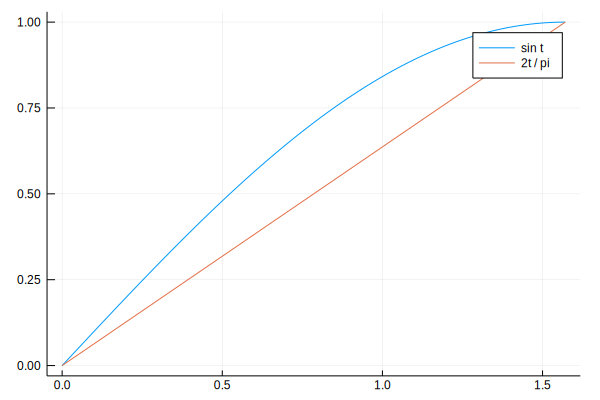

In [19]:
θ = range(0; stop=π/2, length=100)
plot(θ, sin.(θ); label="sin t")
plot!(θ, 2θ/π; label = "2t / pi")

Hence 
$$\left| \int_{C_R} g(z) e^{i \omega z} dz \right|  \leq  2MR \int_0^{\pi\over 2} e^{- {2\omega R\theta \over \pi} } d\theta = {\pi \over \omega} (1 - e^{-\omega R}) M \leq {\pi M \over \omega}.
$$

## Application: Calculating Fourier integrals of weakly decaying functions

Why is this useful? We can use it to apply Residue theorem to We already know $O(z^{-2})$ decay gives us the integral via Residue theorem. And if we only have $z^{-1}$ decay our integral does not converge absolutely:

In [20]:
f = x -> exp(im*x)*x/(x^2+1)
sum(abs.(Fun(f, 0 .. 2000)))

7.600902584542065

However, it does converge conditionally: 
$$
\dashint_{\infty}^\infty  f(x) \dx := \lim_{M\rightarrow \infty} \int_{-M}^M f(x) \dx
$$
converges:

In [21]:
f = x -> exp(im*x)*x/(x^2+1)

sum(Fun(f, -30000 .. 30000))

-6.776263578034403e-21 + 1.1557671135433842im

Thus we can construct a Residue theorem for calculating 
$$
\infdashint g(x) e^{i \omega x} \dx
$$
provided that $g(z) \rightarrow 0$ and is analytic in the upper-half plane.

In [20]:
2π*im*exp(-1)*im/(im+im)  # 2π*im* residue of g(z)exp(im*z) at z = im

0.0 + 1.1557273497909217im